In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from kneed import KneeLocator

from fault_tolerant_ml.data.mnist import MNist, FashionMNist
from fault_tolerant_ml.data import cifar10

%reload_ext autoreload
%autoreload 2

In [2]:
data_dir = "../data/mnist/"
filepaths = {
    "train": {
        "images": os.path.join(data_dir, "train-images-idx3-ubyte.gz"), "labels": os.path.join(data_dir, "train-labels-idx1-ubyte.gz")
    },
    "test": {
        "images": os.path.join(data_dir, "t10k-images-idx3-ubyte.gz"), "labels": os.path.join(data_dir, "t10k-labels-idx1-ubyte.gz")
    }
}
mnist = MNist(filepaths)

In [3]:
data_dir = "../data/fashion-mnist/"
filepaths = {
    "train": {
        "images": os.path.join(data_dir, "train-images-idx3-ubyte.gz"), "labels": os.path.join(data_dir, "train-labels-idx1-ubyte.gz")
    },
    "test": {
        "images": os.path.join(data_dir, "t10k-images-idx3-ubyte.gz"), "labels": os.path.join(data_dir, "t10k-labels-idx1-ubyte.gz")
    }
}
fashion_mnist = FashionMNist(filepaths)

## Dataset exploration

## Mnist exploration

### Plot class distribution

In [4]:
value_counts = pd.DataFrame(
    np.unique(
        np.argmax(
            mnist.y_train.data,
            axis=1
        ),
        return_counts=True
    )[1]
)

## Fashion Mnist exploration

### Plot class distribution

In [5]:
f_value_counts = pd.DataFrame(
    np.unique(
        np.argmax(
            fashion_mnist.y_train.data,
            axis=1
        ),
        return_counts=True
    )[1]
)

In [6]:
f_value_counts.index = fashion_mnist.class_names

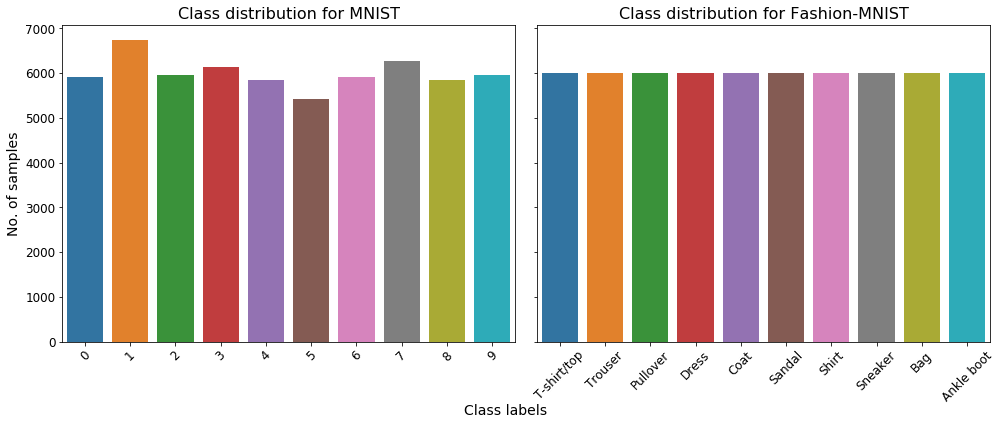

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(14, 6))
# fig = plt.figure(figsize=(14, 6))
# ax = fig.add_subplot(111)    # The big subplot
# ax1 = fig.add_subplot(212)
# ax2 = fig.add_subplot(211)
# axes = [ax1, ax2]
# ax = sns.barplot(value_counts.index, value_counts[0])
sns.barplot(value_counts.index, value_counts[0], ax=axes[0])
axes[0].set_ylabel('No. of samples', fontdict=dict(fontsize=14))
# axes[0].set_xlabel('Class label', fontdict=dict(fontsize=12))
axes[0].set_title('Class distribution for MNIST', fontdict=dict(fontsize=16))#, color='#9e9e9b')
# axes[0].spines['top'].set_visible(False)
# axes[0].spines['right'].set_visible(False)
# axes[0].spines['bottom'].set_color('#d6d6d0')
# axes[0].spines['left'].set_color('#d6d6d0')
# axes[0].set_xlabel('Class distribution')
# ax.xaxis.label.set_color('#9e9e9b')
# ax.yaxis.label.set_color('#9e9e9b')
# ax.tick_params(axis='x', colors='#9e9e9b')
# ax.tick_params(axis='y', colors='#9e9e9b')
# plt.savefig('../reports/figures/mnist-class-distrib.png', dpi=500, format='png')
sns.barplot(f_value_counts.index, f_value_counts[0], ax=axes[1])
axes[1].set_ylabel('', fontdict=dict(fontsize=14))
# axes[1].set_xlabel('Class label', fontdict=dict(fontsize=12))
axes[1].set_title('Class distribution for Fashion-MNIST', fontdict=dict(fontsize=16))#, color='#9e9e9b')
# axes[1].spines['top'].set_visible(False)
# axes[1].spines['right'].set_visible(False)
# axes[1].spines['bottom'].set_color('#d6d6d0')
# axes[1].spines['left'].set_color('#d6d6d0')
# axes[1].tick_params(axis='x', rotation=45, fontsize=12)

# ax.xaxis.label.set_color('#9e9e9b')
# ax.yaxis.label.set_color('#9e9e9b')
# ax.tick_params(axis='x', colors='#9e9e9b')
# ax.tick_params(axis='y', colors='#9e9e9b')
# Pad margins so that markers don't get clipped by the axes
# # Tweak spacing to prevent clipping of tick-labels
fig.tight_layout()
plt.subplots_adjust(bottom=0.2)
fig.text(0.5, 0.04, 'Class labels', ha='center', va='center', fontdict=dict(fontsize=14))
plt.setp(axes[0].get_xticklabels(), ha='center', rotation=45, fontsize=12)
plt.setp(axes[1].get_xticklabels(), ha='center', rotation=45, fontsize=12)
plt.setp(axes[0].get_yticklabels(), fontsize=12)
plt.setp(axes[1].get_yticklabels(), fontsize=12)
# plt.savefig('../reports/figures/mnist-class-distrib.png', dpi=500, format='png')
plt.savefig('../reports/figures/mnists-class-distrib.png', dpi=500, format='png')

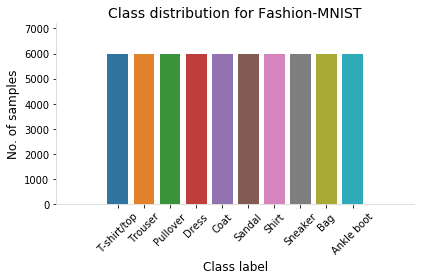

In [134]:
ax = sns.barplot(f_value_counts.index, f_value_counts[0])
ax.set_ylabel('No. of samples', fontdict=dict(fontsize=12))
ax.set_xlabel('Class label', fontdict=dict(fontsize=12))
ax.set_title('Class distribution for Fashion-MNIST', fontdict=dict(fontsize=14))#, color='#9e9e9b')
ax.figure.gca().spines['top'].set_visible(False)
ax.figure.gca().spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#d6d6d0')
ax.spines['left'].set_color('#d6d6d0')
# You can specify a rotation for the tick labels in degrees or with keywords.
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
# plt.subplots_adjust(bottom=0.15)
# ax.xaxis.label.set_color('#9e9e9b')
# ax.yaxis.label.set_color('#9e9e9b')
ax.tick_params(axis='x', rotation=45)
# ax.tick_params(axis='x', colors='#9e9e9b')
# ax.tick_params(axis='y', colors='#9e9e9b')
# Pad margins so that markers don't get clipped by the axes
# # Tweak spacing to prevent clipping of tick-labels
plt.tight_layout()
plt.savefig(
    '../reports/figures/f-mnist-class-distrib.png',
    bbox_inches="tight",
    dpi=500,
    format='png',
    pad_inches=0
)